In [57]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pharma-sales-data/salesdaily.csv
/kaggle/input/pharma-sales-data/salesweekly.csv
/kaggle/input/pharma-sales-data/salesmonthly.csv
/kaggle/input/pharma-sales-data/saleshourly.csv
/kaggle/input/bakery-sales/Bakery Sales.csv
/kaggle/input/bakery-sales/Bakery price.csv


# Venda mensal da farmácia:

In [58]:
venda_mensal = pd.read_csv('/kaggle/input/pharma-sales-data/salesmonthly.csv')
venda_mensal

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [59]:
venda_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [60]:
venda_mensal['datum'] = pd.to_datetime(venda_mensal['datum'])
venda_mensal.rename(columns = {'datum' : 'Data'}, inplace = True)
venda_mensal.head()

,Data,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


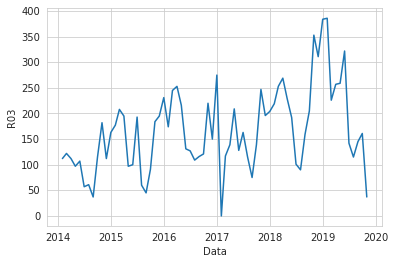

In [61]:
sns.lineplot(x = 'Data', y = 'R03', data = venda_mensal);

In [62]:
def plota_grafico(titulo, label_x, label_y, eixo_x, eixo_y, dataset):
    sns.color_palette("cubehelix", as_cmap = True)
    sns.set_style('whitegrid')
    ax = sns.lineplot(x = eixo_x, y = eixo_y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'center', fontsize = 18)
    ax.set_xlabel(label_x, fontsize = 14)
    ax.set_ylabel(label_y, fontsize = 14)
    ax = ax

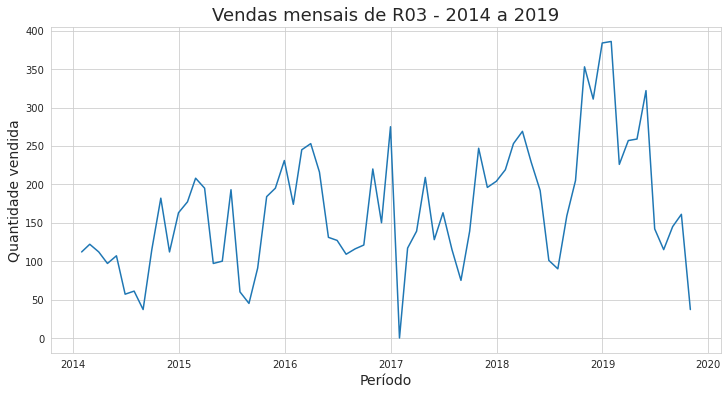

In [63]:
plota_grafico('Vendas mensais de R03 - 2014 a 2019', 'Período', 'Quantidade vendida', 'Data', 'R03', venda_mensal)

In [64]:
# Análise do aumento das vendas de R03

venda_mensal['vendas_R03'] = venda_mensal['R03'].diff()
venda_mensal.head(3)

,Data,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,vendas_R03
0,2014-01-31,127.69,99.09,152.100,878.030,354.0,50.0,112.0,48.2,NaN
1,2014-02-28,133.32,126.05,177.000,1001.900,347.0,31.0,122.0,36.2,10.0
2,2014-03-31,137.44,92.95,147.655,779.275,232.0,20.0,112.0,85.4,-10.0


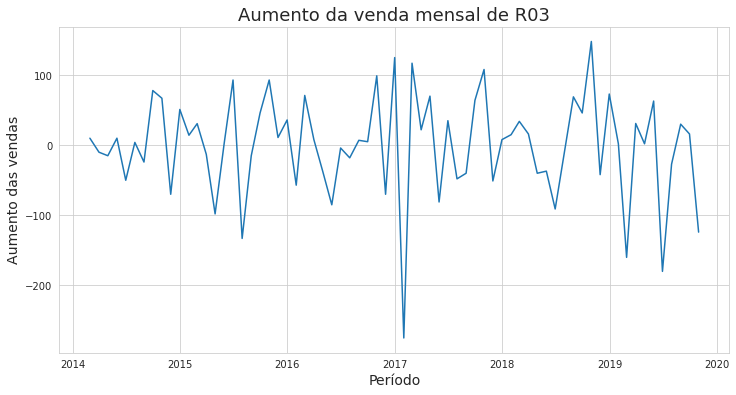

In [65]:
plota_grafico('Aumento da venda mensal de R03', 'Período', 'Aumento das vendas', 'Data', 'vendas_R03', venda_mensal)

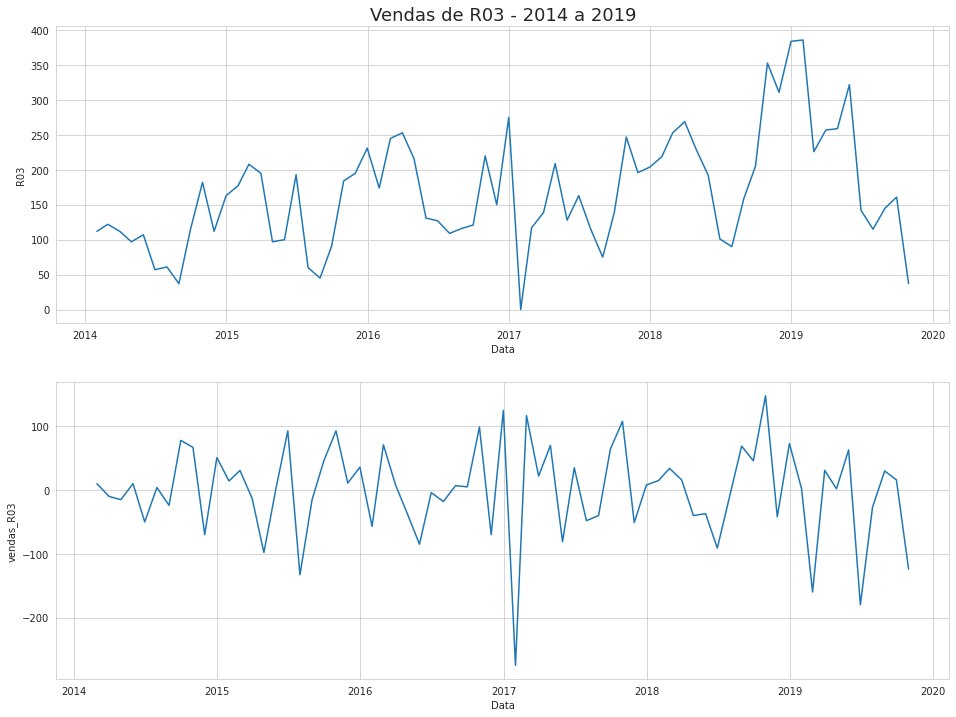

In [66]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas de R03 - 2014 a 2019', fontsize = 18, loc = 'center')
sns.lineplot(x = 'Data', y = 'R03', data = venda_mensal)
plt.subplot(2, 1, 2)
sns.lineplot(x = 'Data', y = 'vendas_R03', data = venda_mensal)
ax = ax

## Analisando um cenário oposto:

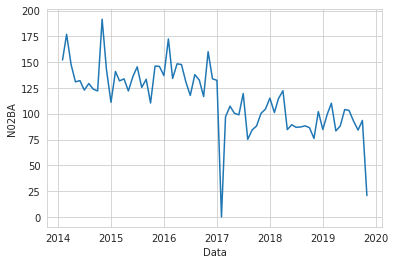

In [67]:
sns.lineplot(x = 'Data', y = 'N02BA', data = venda_mensal);

In [68]:
venda_mensal['diferenca_N02BA'] = venda_mensal['N02BA'].diff()
venda_mensal.head()

,Data,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,vendas_R03,diferenca_N02BA
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,NaN,NaN
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,10.0,24.900
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,-10.0,-29.345
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,-15.0,-16.755
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,10.0,1.200


In [69]:
def comparacao_dos_graficos(eixo_x, eixo_y1, eixo_y2, dataset, titulo_do_grafico):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(2, 1, 1)
    ax.set_title(titulo_do_grafico, fontsize = 18, loc = 'center')
    sns.lineplot(x = eixo_x, y = eixo_y1, data = dataset)
    plt.subplot(2, 1, 2)
    sns.lineplot(x = eixo_x, y = eixo_y2, data = dataset)
    ax = ax

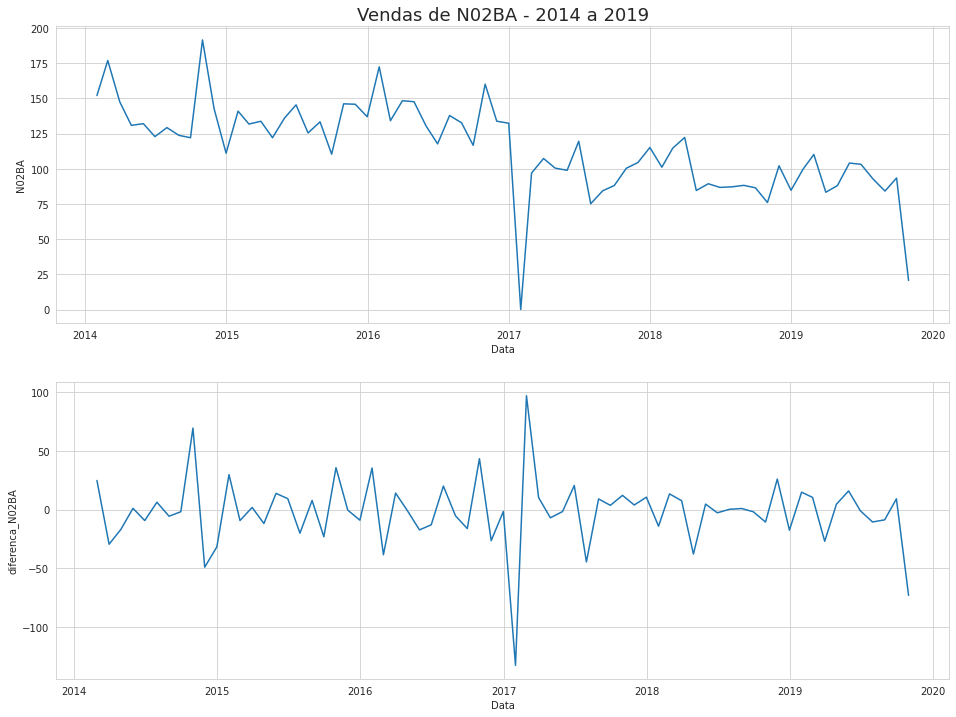

In [70]:
comparacao_dos_graficos('Data', 'N02BA', 'diferenca_N02BA', venda_mensal, 'Vendas de N02BA - 2014 a 2019')

Quando vi este gráfico, percebi que deixei passar um outlier. Tanto o R03 quanto o N02BA possuem vendas zeradas ou próximas a zero, em 2017.

In [71]:
venda_mensal.iloc[36]

Data               2017-01-31 00:00:00
M01AB                              0.0
M01AE                              0.0
N02BA                              0.0
N02BE                              0.0
N05B                               1.0
N05C                               0.0
R03                                0.0
R06                                0.0
vendas_R03                      -275.0
diferenca_N02BA                 -132.4
Name: 36, dtype: object

In [72]:
vendas_de_01_2017 = venda_mensal['Data'] == '2017-01-31'
venda_mensal[vendas_de_01_2017]

,Data,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,vendas_R03,diferenca_N02BA
36,2017-01-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-275.0,-132.4


In [73]:
vendas_sem_janeiro_2017 = venda_mensal.drop([36])
vendas_sem_janeiro_2017.drop(['vendas_R03', 'diferenca_N02BA'], axis=1, inplace = True)
vendas_sem_janeiro_2017.head()

,Data,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Com a retirada das informações referentes ao mês de janeiro, os gráficos ficaram com uma escala diferente, que facilitou a visualização das diferenças de vendas entre os meses. Pois até os registro de 2017, as vendas oscilavam mais entre 40 e -20, depois passou a ser entre 20 e -20.

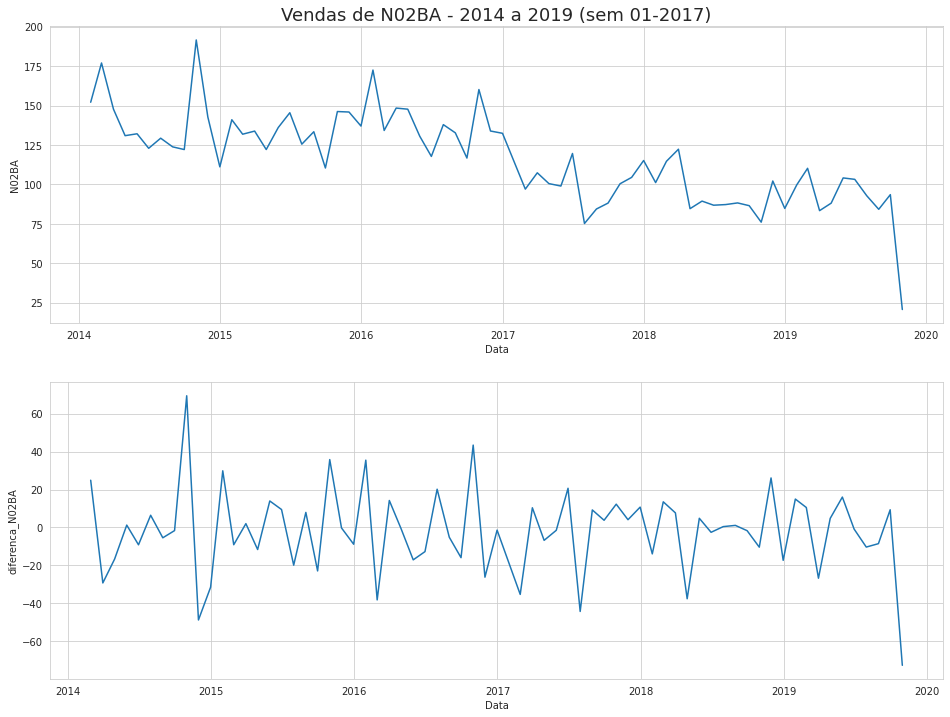

In [74]:
vendas_sem_janeiro_2017['vendas_R03'] = vendas_sem_janeiro_2017['R03'].diff()
vendas_sem_janeiro_2017['diferenca_N02BA'] = vendas_sem_janeiro_2017['N02BA'].diff()
comparacao_dos_graficos('Data', 'N02BA', 'diferenca_N02BA', vendas_sem_janeiro_2017, 'Vendas de N02BA - 2014 a 2019 (sem 01-2017)')

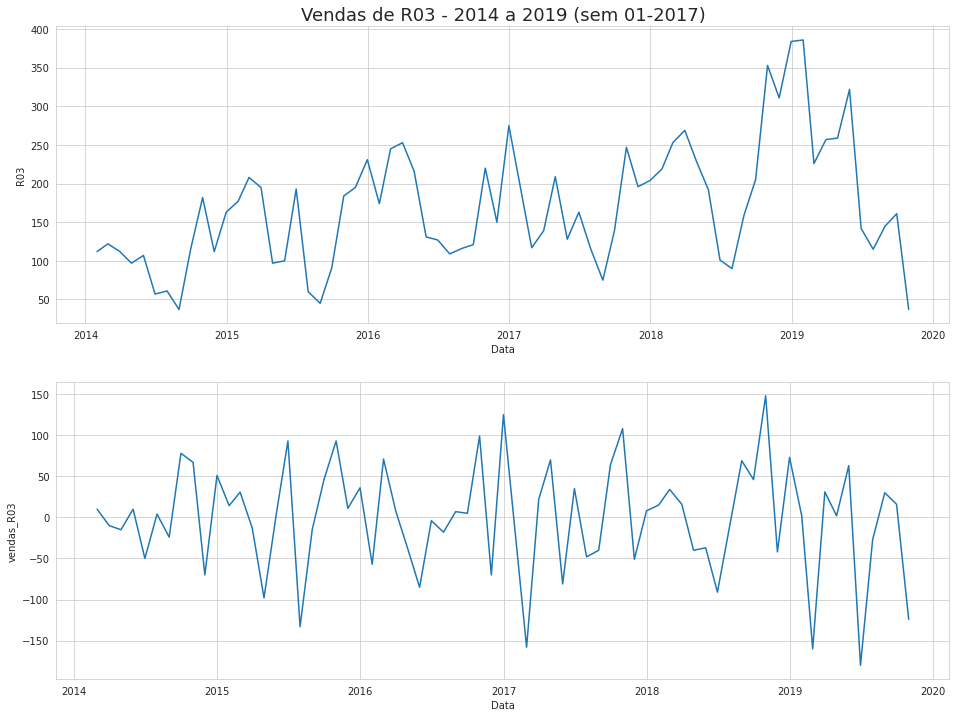

In [75]:
comparacao_dos_graficos('Data', 'R03', 'vendas_R03', vendas_sem_janeiro_2017, 'Vendas de R03 - 2014 a 2019 (sem 01-2017)')

### Sazonalidade:

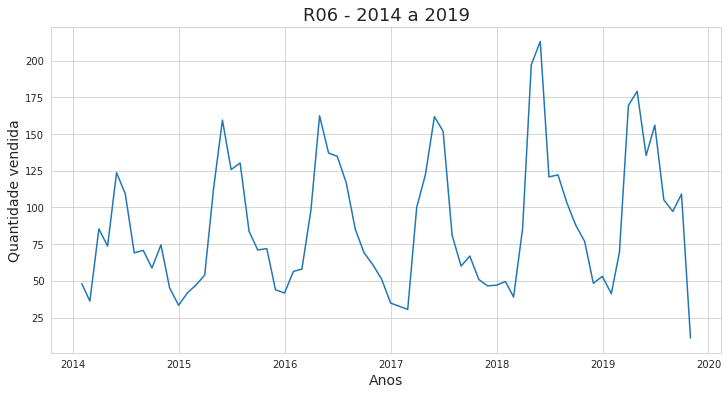

In [76]:
plota_grafico('R06 - 2014 a 2019', 'Anos', 'Quantidade vendida', 'Data', 'R06', vendas_sem_janeiro_2017)

In [77]:
vendas_sem_janeiro_2017['aumento_R06'] = vendas_sem_janeiro_2017['R06'].diff()
vendas_sem_janeiro_2017['aceleracao_R06'] = vendas_sem_janeiro_2017['aumento_R06'].diff()
vendas_sem_janeiro_2017.sample(5)

,Data,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,vendas_R03,diferenca_N02BA,aumento_R06,aceleracao_R06
13,2015-02-28,115.71,123.740,131.83,953.252,243.0,9.0,208.0,47.0,30.75,-9.17,5.00,-3.60
19,2015-08-31,181.69,144.519,133.40,790.788,265.5,15.0,45.0,83.7,-15.00,7.90,-46.60,-51.10
24,2016-01-31,171.65,128.402,172.50,1476.324,248.0,24.0,174.0,56.5,-57.00,35.50,14.77,17.04
16,2015-05-31,160.02,119.117,136.04,765.900,194.0,10.0,100.0,159.5,3.00,13.94,47.50,-10.50
22,2015-11-30,152.78,128.233,145.90,1277.725,228.0,18.0,195.0,44.0,11.00,-0.30,-28.00,-29.00


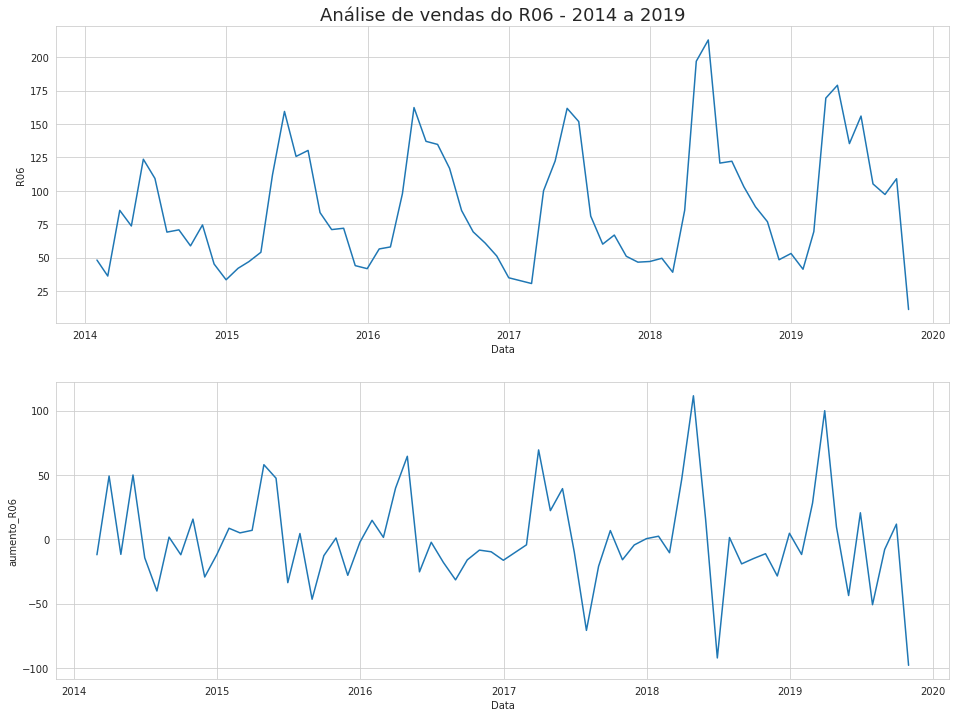

In [78]:
comparacao_dos_graficos('Data', 'R06', 'aumento_R06', vendas_sem_janeiro_2017, 'Análise de vendas do R06 - 2014 a 2019')

### Statsmodel:

In [79]:
!pip install statsmodels==0.12.1

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

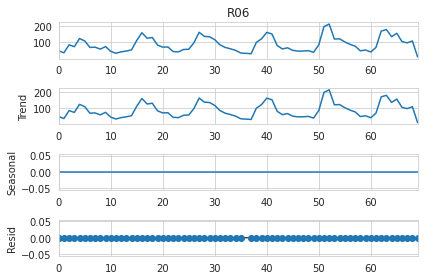

In [81]:
resultado = seasonal_decompose(vendas_sem_janeiro_2017['R06'], period = 1)
ax = resultado.plot()

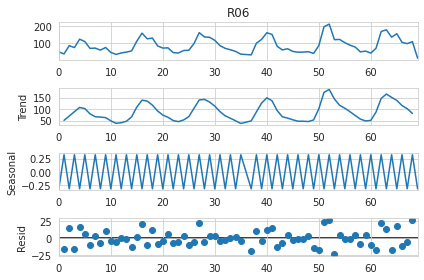

In [82]:
resultado = seasonal_decompose(vendas_sem_janeiro_2017['R06'], period = 2)
ax = resultado.plot()

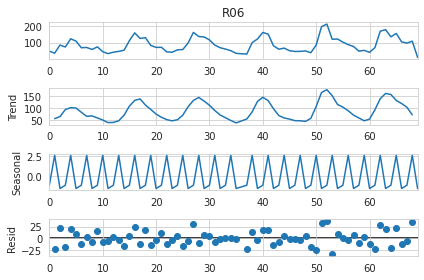

In [83]:
resultado = seasonal_decompose(vendas_sem_janeiro_2017['R06'], period = 3)
ax = resultado.plot()

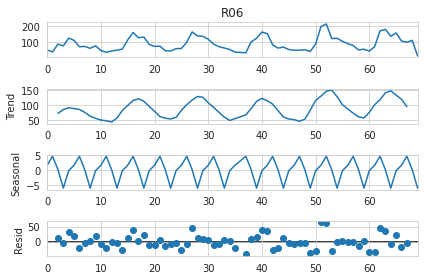

In [84]:
resultado = seasonal_decompose(vendas_sem_janeiro_2017['R06'], period = 5)
ax = resultado.plot()

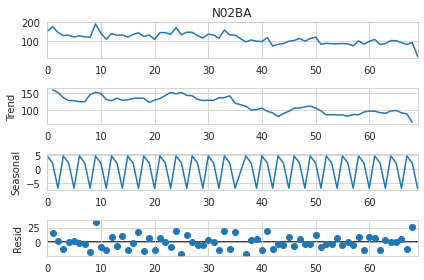

In [85]:
# com N02BA:
resultado = seasonal_decompose(vendas_sem_janeiro_2017['N02BA'], period = 3)
ax = resultado.plot()

# Vendas da panificadora

In [86]:
venda_diaria = pd.read_csv('/kaggle/input/bakery-sales/Bakery Sales.csv')
venda_diaria

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
venda_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

In [88]:
venda_diaria['datetime'] = pd.to_datetime(venda_diaria['datetime'])
venda_diaria.rename(columns = {'datetime' : 'Dia', 'day of week' : 'dia_da_semana'}, inplace = True)
venda_diaria.sample(5)

,Dia,dia_da_semana,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
1421,2020-01-12 12:16:00,Sun,44100.0,후평 3동,NaN,2.0,NaN,NaN,2.0,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182,2020-04-02 11:54:00,Thur,15300.0,효자 2동,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,2020-03-18 12:18:00,Wed,14500.0,후평 3동,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,2020-02-26 15:49:00,Wed,21200.0,교동,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2019-09-01 12:39:00,Sun,28300.0,후평 3동,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [89]:
panificadora = pd.DataFrame({
    'dia' : venda_diaria['Dia'].dt.date,
    'hora' : venda_diaria['Dia'].dt.time,
    'dia_da_semana' : venda_diaria['dia_da_semana'],
    'total' : venda_diaria['total']
})
panificadora

,dia,hora,dia_da_semana,total
0,2019-07-11,15:35:00,Thur,23800.0
1,2019-07-11,16:10:00,Thur,15800.0
2,2019-07-12,11:49:00,Fri,58000.0
3,2019-07-13,13:19:00,Sat,14800.0
4,2019-07-13,13:22:00,Sat,15600.0
...,...,...,...,...
2649,NaT,NaT,NaN,NaN
2650,NaT,NaT,NaN,NaN
2651,NaT,NaT,NaN,NaN
2652,NaT,NaT,NaN,NaN


In [90]:
# Existem linhas em branco no dataset

sum(venda_diaria['Dia'] >= '2020-05-02')

6

In [91]:
# Que não possuem nem a data

sem_informacao = (venda_diaria['Dia'] >= '2020-05-02')
venda_diaria[sem_informacao]

,Dia,dia_da_semana,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
2415,2020-05-02 11:37:00,Sat,19500.0,동면,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39:00,Sat,19800.0,후평 1동,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15:00,Sat,14300.0,효자 2동,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45:00,Sat,15000.0,소양동,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2419,2020-05-02 14:45:00,Sat,24100.0,효자 1동,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2653,2020-06-18 14:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Excluindo as linhas que não tem dados

panificadora = panificadora.drop(labels = range(2420, 2654), axis=0)
panificadora

,dia,hora,dia_da_semana,total
0,2019-07-11,15:35:00,Thur,23800.0
1,2019-07-11,16:10:00,Thur,15800.0
2,2019-07-12,11:49:00,Fri,58000.0
3,2019-07-13,13:19:00,Sat,14800.0
4,2019-07-13,13:22:00,Sat,15600.0
...,...,...,...,...
2415,2020-05-02,11:37:00,Sat,19500.0
2416,2020-05-02,11:39:00,Sat,19800.0
2417,2020-05-02,12:15:00,Sat,14300.0
2418,2020-05-02,13:45:00,Sat,15000.0


In [93]:
panificadora.dia_da_semana.unique()

array(['Thur', 'Fri', 'Sat', 'Sun', 'Mon', 'Wed', 'Tues'], dtype=object)

In [94]:
dias = {
    'Mon' : 'Segunda',
    'Tues' : 'Terca',
    'Wed' : 'Quarta',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta',
    'Sat' : 'Sabado',
    'Sun' : 'Domingo'
}

In [95]:
panificadora['dia_da_semana'] = panificadora['dia_da_semana'].map(dias)
panificadora.head()

,dia,hora,dia_da_semana,total
0,2019-07-11,15:35:00,Quinta,23800.0
1,2019-07-11,16:10:00,Quinta,15800.0
2,2019-07-12,11:49:00,Sexta,58000.0
3,2019-07-13,13:19:00,Sabado,14800.0
4,2019-07-13,13:22:00,Sabado,15600.0


In [96]:
panificadora.groupby('dia')['total'].sum().round()

dia
2019-07-11     39600.0
2019-07-12     58000.0
2019-07-13    117400.0
2019-07-14    212000.0
2019-07-15     30900.0
                ...   
2020-04-27    264600.0
2020-04-29    118100.0
2020-04-30    134100.0
2020-05-01    215700.0
2020-05-02     92700.0
Name: total, Length: 249, dtype: float64

In [97]:
vendas_do_dia = pd.DataFrame(panificadora.groupby('dia')['total'].sum().round())
vendas_do_dia.reset_index(inplace = True)
vendas_do_dia['dia'] = pd.to_datetime(vendas_do_dia['dia'])
vendas_do_dia

,dia,total
0,2019-07-11,39600.0
1,2019-07-12,58000.0
2,2019-07-13,117400.0
3,2019-07-14,212000.0
4,2019-07-15,30900.0
...,...,...
244,2020-04-27,264600.0
245,2020-04-29,118100.0
246,2020-04-30,134100.0
247,2020-05-01,215700.0


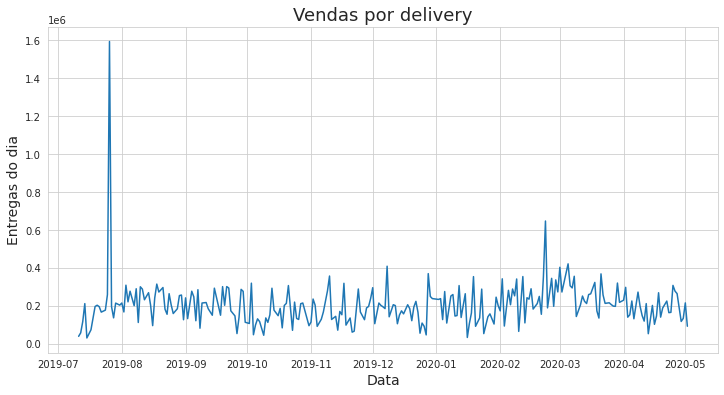

In [98]:
plota_grafico('Vendas por delivery', 'Data', 'Entregas do dia', 'dia', 'total', vendas_do_dia)

In [99]:
vendas_do_dia['aumento'] = vendas_do_dia['total'].diff()
vendas_do_dia['aceleracao'] = vendas_do_dia['aumento'].diff()
vendas_do_dia

,dia,total,aumento,aceleracao
0,2019-07-11,39600.0,NaN,NaN
1,2019-07-12,58000.0,18400.0,NaN
2,2019-07-13,117400.0,59400.0,41000.0
3,2019-07-14,212000.0,94600.0,35200.0
4,2019-07-15,30900.0,-181100.0,-275700.0
...,...,...,...,...
244,2020-04-27,264600.0,-13100.0,17100.0
245,2020-04-29,118100.0,-146500.0,-133400.0
246,2020-04-30,134100.0,16000.0,162500.0
247,2020-05-01,215700.0,81600.0,65600.0


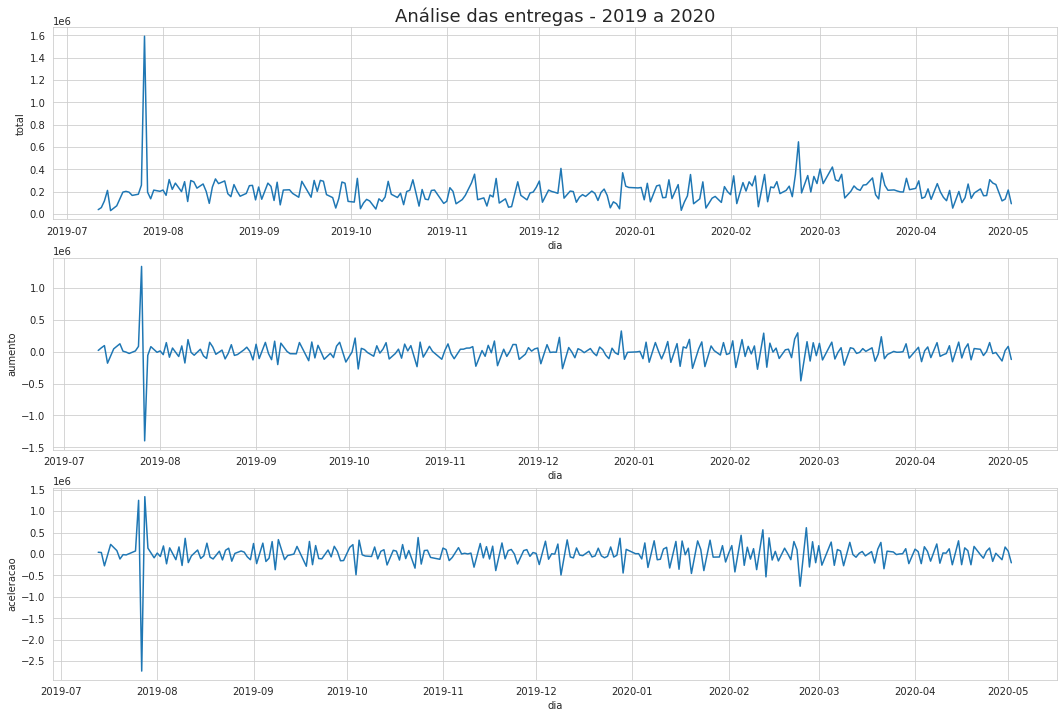

In [100]:
plt.figure(figsize = (18,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise das entregas - 2019 a 2020', fontsize = 18, loc = 'center')
sns.lineplot(x = 'dia', y = 'total', data = vendas_do_dia)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'dia', y = 'aumento', data = vendas_do_dia)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'dia', y = 'aceleracao', data = vendas_do_dia)
ax = ax

In [108]:
vendas_do_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dia         249 non-null    datetime64[ns]
 1   total       249 non-null    float64       
 2   aumento     248 non-null    float64       
 3   aceleracao  247 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


In [109]:
sem_outlier = (vendas_do_dia['dia'] >= '2019-08-01')
panificadora_sem_outlier = vendas_do_dia[sem_outlier]
panificadora_sem_outlier.reset_index(inplace = True)
panificadora_sem_outlier.drop(['index'], axis = 1, inplace = True)
panificadora_sem_outlier

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dia,total,aumento,aceleracao
0,2019-08-01,215200.0,11300.0,22000.0
1,2019-08-02,168000.0,-47200.0,-58500.0
2,2019-08-03,309000.0,141000.0,188200.0
3,2019-08-04,221200.0,-87800.0,-228800.0
4,2019-08-05,277300.0,56100.0,143900.0
...,...,...,...,...
227,2020-04-27,264600.0,-13100.0,17100.0
228,2020-04-29,118100.0,-146500.0,-133400.0
229,2020-04-30,134100.0,16000.0,162500.0
230,2020-05-01,215700.0,81600.0,65600.0


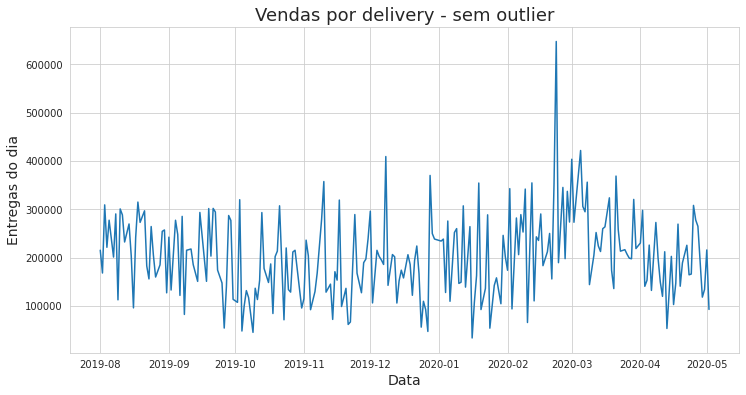

In [110]:
plota_grafico('Vendas por delivery - sem outlier', 'Data', 'Entregas do dia', 'dia', 'total', panificadora_sem_outlier)

### Média móvel:

In [111]:
panificadora_sem_outlier['media_movel'] = panificadora_sem_outlier['total'].rolling(7).mean()
panificadora_sem_outlier.head(8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dia,total,aumento,aceleracao,media_movel
0,2019-08-01,215200.0,11300.0,22000.0,NaN
1,2019-08-02,168000.0,-47200.0,-58500.0,NaN
2,2019-08-03,309000.0,141000.0,188200.0,NaN
3,2019-08-04,221200.0,-87800.0,-228800.0,NaN
4,2019-08-05,277300.0,56100.0,143900.0,NaN
5,2019-08-07,201000.0,-76300.0,-132400.0,NaN
6,2019-08-08,290300.0,89300.0,165600.0,240285.714286
7,2019-08-09,112500.0,-177800.0,-267100.0,225614.285714


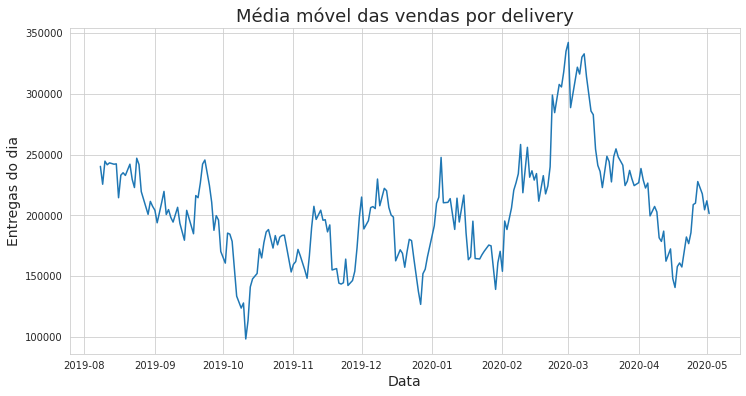

In [112]:
plota_grafico('Média móvel das vendas por delivery', 'Data', 'Entregas do dia', 'dia', 'media_movel', panificadora_sem_outlier)

In [113]:
panificadora_sem_outlier['media_movel_21'] = panificadora_sem_outlier['total'].rolling(21).mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


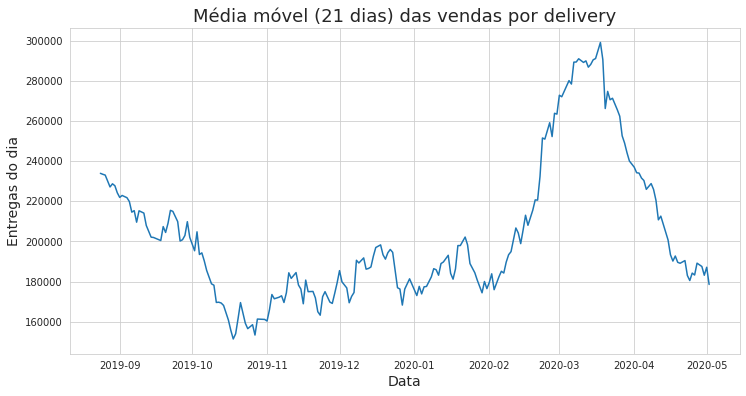

In [114]:
plota_grafico('Média móvel (21 dias) das vendas por delivery', 'Data', 'Entregas do dia', 'dia', 'media_movel_21', panificadora_sem_outlier)

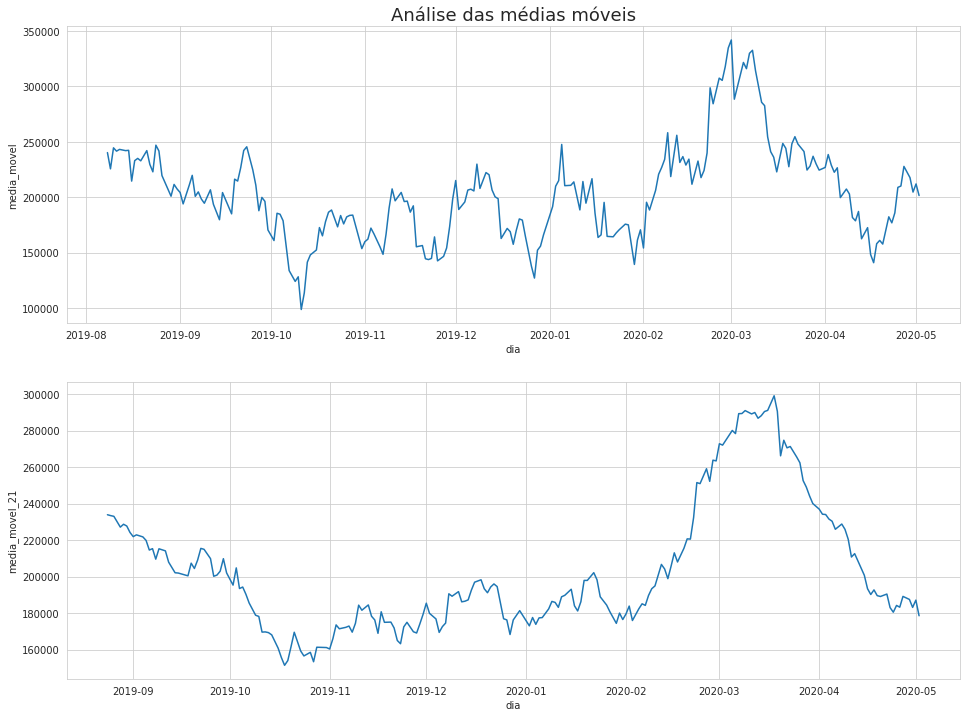

In [117]:
comparacao_dos_graficos('dia', 'media_movel', 'media_movel_21', panificadora_sem_outlier, 'Análise das médias móveis')

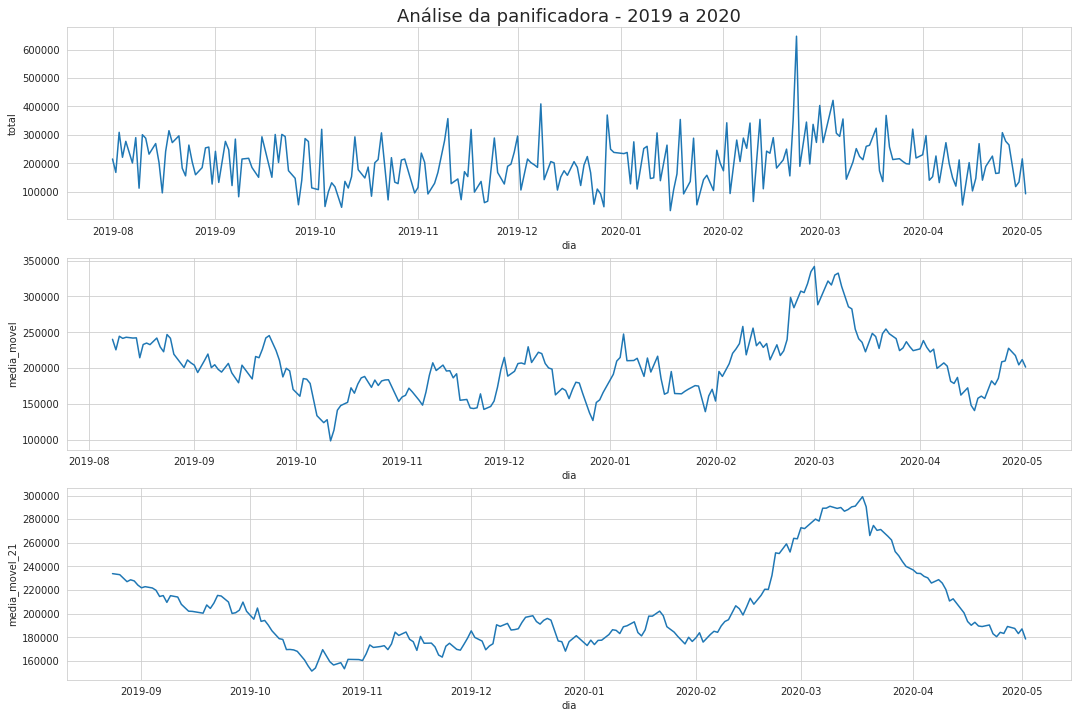

In [118]:
plt.figure(figsize = (18,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise da panificadora - 2019 a 2020', fontsize = 18, loc = 'center')
sns.lineplot(x = 'dia', y = 'total', data = panificadora_sem_outlier)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'dia', y = 'media_movel', data = panificadora_sem_outlier)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'dia', y = 'media_movel_21', data = panificadora_sem_outlier)
ax = ax